In [275]:
import numpy as np
import matplotlib.pyplot as plt
import metpy as mp
import xarray as xr
import cftime
from CESM_Scripts import netCDFplot
import sys


from matplotlib.ticker import ScalarFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
from matplotlib.ticker import ScalarFormatter

In [2]:
Ozone_input_file = "/glade/work/aaroj/aquaplanet_ozone_hightop_c20180412.nc"
dataset = xr.open_dataset(Ozone_input_file,engine="netcdf4")
dataset = dataset.metpy.parse_cf()
O3 = dataset['OZONE']
dataset.close()
print(O3)


<xarray.DataArray 'OZONE' (time: 12, lev: 69, lat: 96, lon: 144)> Size: 92MB
[11446272 values with dtype=float64]
Coordinates:
  * time       (time) float64 96B 4.382e+04 4.384e+04 ... 4.412e+04 4.415e+04
  * lev        (lev) float32 276B 5e-06 1e-05 1.5e-05 ... 925.0 950.0 1e+03
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
    metpy_crs  object 8B Projection: latitude_longitude
Attributes:
    units:    FRACTION


In [276]:
Ozone4Xi_file = "/glade/derecho/scratch/nandrosk/q.e20.QPC4.ne16_ne16_mg17.4xiOzone/run/q.e20.QPC4.ne16_ne16_mg17.4xiOzone.cam.h0a.0001-01-31-00000.nc"
Ozone4Xd_file = "/glade/derecho/scratch/nandrosk/q.e20.QPC4.ne16_ne16_mg17.4xdOzone/run/q.e20.QPC4.ne16_ne16_mg17.4xdOzone.cam.h0a.0001-01-31-00000.nc"
Ozone1X_file = "/glade/derecho/scratch/nandrosk/q.e20.QPC4.ne16_ne16_mg17.001/run/q.e20.QPC4.ne16_ne16_mg17.001.cam.h0a.total.nc"
QBO_Ozone4Xi_file = "/glade/derecho/scratch/nandrosk/q.e20.QPC4.ne16_ne16_mg17.QBO_4XiOzone/run/q.e20.QPC4.ne16_ne16_mg17.QBO_4XiOzone.cam.h0a.0001-01-31-00000.nc"
QBO_Ozone4Xd_file = "/glade/derecho/scratch/nandrosk/q.e20.QPC4.ne16_ne16_mg17.QBO_4XdOzone/run/q.e20.QPC4.ne16_ne16_mg17.QBO_4XdOzone.cam.h0a.0001-01-31-00000.nc"
QBO_Ozone1X_file = '/glade/derecho/scratch/nandrosk/q.e20.QPC4.ne16_ne16_mg17.QBO_check/run/q.e20.QPC4.ne16_ne16_mg17.QBO_check.cam.h0a.0001-01-31-00000.nc'

In [280]:
def meridional_avg(Z,lat_bounds=(-90,90),time=True):
    top_index = np.absolute(Z.lat-lat_bounds[1]).argmin().values
    bottom_index = np.absolute(Z.lat-lat_bounds[0]).argmin().values

    if time:
        weights = np.cos(np.pi/180 * Z.lat[bottom_index:top_index+1])
        weighted_sum = np.sum((weights * Z[:,:,bottom_index:top_index+1]),axis=0)
        total_weight = weights.sum()
        area_weighted_average = weighted_sum / total_weight
    else: # if time has already be averaged out.
        weights = np.cos(np.pi/180 * Z.lat[bottom_index:top_index+1])
        weighted_sum = np.sum((weights * Z[:,bottom_index:top_index+1]),axis=0)
        total_weight = weights.sum()
        area_weighted_average = weighted_sum / total_weight
    
    return area_weighted_average

In [11]:
def extract_timeAverage(input_file,parameter_names,start_year=0):
    start_time = cftime.DatetimeNoLeap(start_year,1,1,has_year_zero=True)
    dataset = xr.open_dataset(input_file)
    dataset = dataset.metpy.parse_cf()
    parameters = []
    for name in parameter_names: 
        Z = dataset[name]
        if 'time' in Z.coords:
            Z = Z[Z.time>=start_time].mean('time')
        parameters.append(Z)
    dataset.close()
    return tuple(parameters)

# Control and Difference Plots

In [80]:
v_levels = np.arange(-5, 5+1, 1)
v_levels_tropo_1x = np.arange(-4, 4+1, 1)
u_levels_nonequidistant = np.concatenate((np.arange(-30, 0, 5),np.arange(0, 140+20, 20)))
u_levels_nonequidistant_tropo = np.concatenate((np.arange(-15, 0, 5),np.arange(0, 60+10, 10)))
T_levels = np.arange(190, 300+10, 10)
cloud_levels = np.arange(0,.8+0.1,0.1)
cldtot_levels = np.arange(0.7, 1, 0.05)
PS_levels = np.arange(990, 1030+5, 5)
omega_levels = np.concatenate((np.arange(-0.1, 0 ,0.02), np.arange(0, 0.03+0.01, 0.01)))
omega_levels_strat = np.concatenate((np.arange(-0.001, 0 ,0.0002), np.arange(0, 0.001+0.0002, 0.0002)))
Q_levels = np.arange(0, 0.018+0.002, 0.002)
QRL_levels_tropo = levels = np.concatenate((np.arange(-1E-4, 0, 2.5E-5),np.arange(0,2.5e-5+5e-6,5e-6)))
QRL_levels_strat = np.arange(-3E-4, 5E-5+5E-5, 5E-5)
QRS_levels_tropo = np.arange(0,4e-5+5e-6,5e-6)
QRS_levels_strat = np.arange(0,3e-4+5e-5,5e-5)
FLUT_levels = np.arange(175,265+10,10)
QRS_levels_strat_1x = np.arange(0,1.3e-4+1e-5,1e-5)
QRS_levels_tropo_1x = np.arange(0,4.5e-5+5e-6,5e-6)
QRL_levels_strat_1x = np.concatenate((np.arange(-1.2E-4, 0, 2E-5),np.arange(0,.4E-5+1E-6,1E-6)))

In [4]:
U,V,OMEGA,T,Q,CLOUD,CLDTOT=extract_timeAverage(Ozone1X_file,['U','V','OMEGA','T','Q','CLOUD','CLDTOT'],start_year=5)

-1.0
Max Value: 9.73E-01
Min Value: 7.25E-01
Mean Magnitude: 8.61E-01


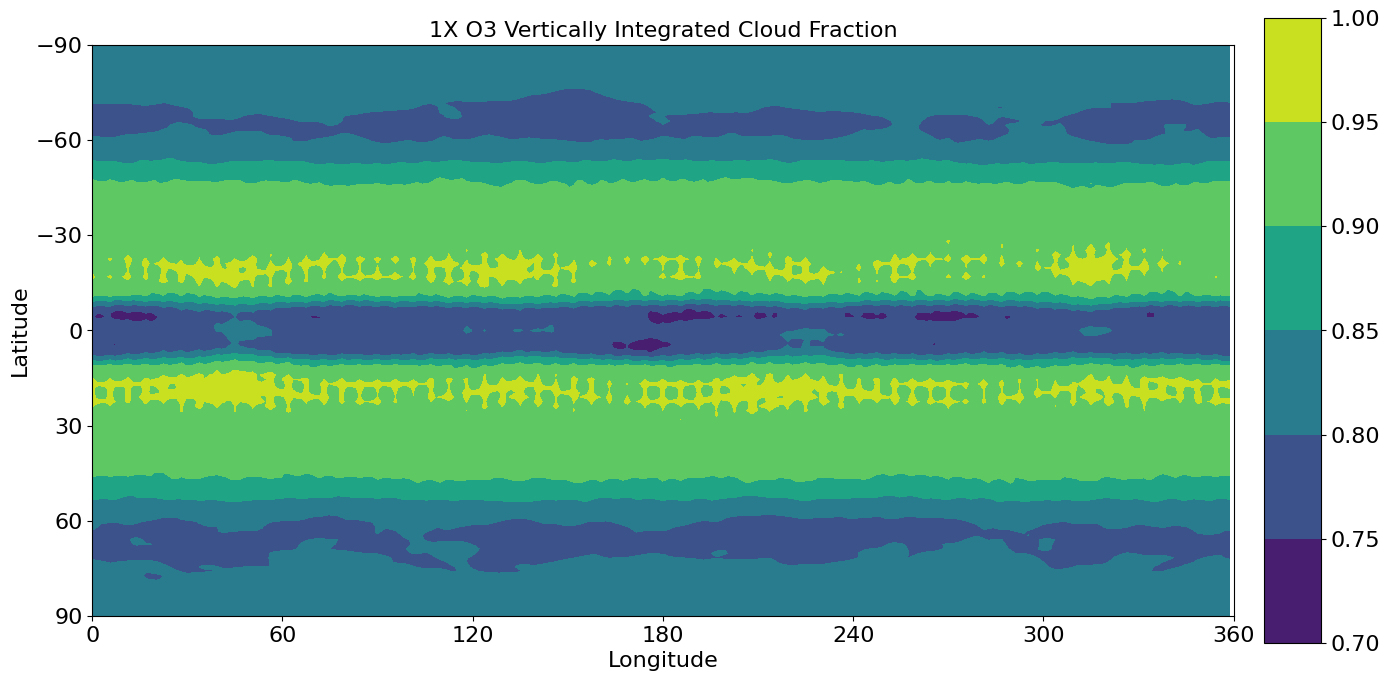

In [106]:
cbar_ticks = np.concatenate((np.arange(-1.2E-4, 0, 2E-5),np.array([0,4E-6])))


cloud_levels = np.arange(0,.8+0.1,0.1)
# cbar_ticks = np.concatenate((np.arange(-1E-4, 0, 2.5E-5),[0,.5e-5,1.5e-5,2.5e-5]))
# p_levels = np.array([900,300,100,30,10,3,1,0.3]) #log
p_levels = np.array([900,700,500,300,100,10]) #linear

netCDFplot.plot_contour(CLDTOT, 'lon', 'lat', cmap='viridis',
                        title=r'1X O3 Vertically Integrated Cloud Fraction',
                        levels=cldtot_levels,
                        show=False, save=False,
                        output_file='CESM_Scripts/cesm_plot/1xOzone_CLDTOT_lonlat_5yr',
                        flip_y=True, plot_size=(14,7), axlabel_size=16,
                        titlelabel_size=16, extend=False,
                        aspect_ratio='2:1', log_y=False, center=False)

In [30]:
SST=extract_timeAverage(Ozone1X_file,['SST'],start_year=5)[0]


NameError: name 'cldtot_levels' is not defined

2.0
Max Value: 3.00E+02
Min Value: 2.73E+02
Mean Magnitude: 2.83E+02


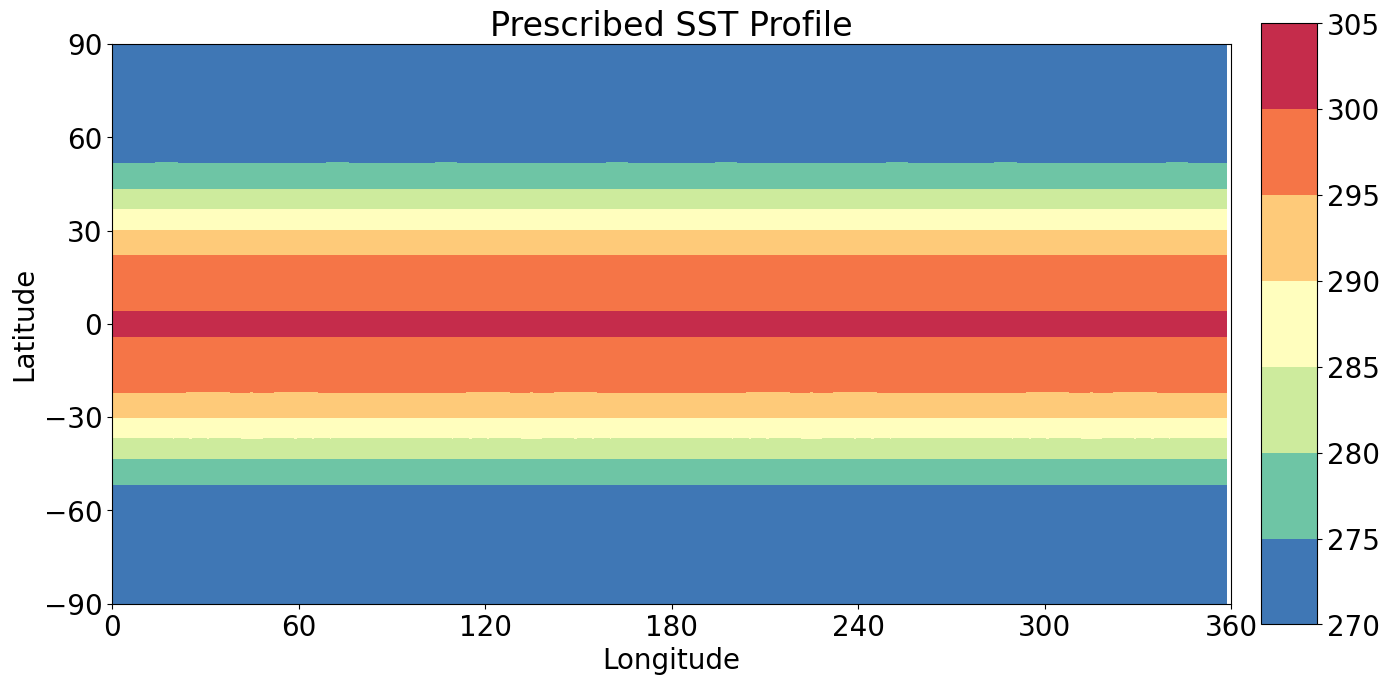

In [56]:
SST_levels = np.arange(270,305+5,5)
netCDFplot.plot_contour(SST, 'lon', 'lat', cmap='Spectral_r',
                        title=r'Prescribed SST Profile',
                        levels=SST_levels,
                        show=False, save=False,
                        output_file='CESM_Scripts/Final_Plots/prescribedSST_profile',
                        flip_y=False, plot_size=(14,7), axlabel_size=20,
                        titlelabel_size=24, extend=False,
                        aspect_ratio='2:1', log_y=False, center=False)

## Difference Plots

In [79]:
U=extract_timeAverage(Ozone1X_file,['U'],start_year=5)[0]
U_4Xi=extract_timeAverage(Ozone4Xi_file,['U'],start_year=5)[0]
U_4Xd=extract_timeAverage(Ozone4Xd_file,['U'],start_year=5)[0]


In [99]:
V=extract_timeAverage(Ozone1X_file,['V'],start_year=5)[0]
V_4Xi=extract_timeAverage(Ozone4Xi_file,['V'],start_year=5)[0]
V_4Xd=extract_timeAverage(Ozone4Xd_file,['V'],start_year=5)[0]


In [113]:
OMEGA=extract_timeAverage(Ozone1X_file,['OMEGA'],start_year=5)[0]
OMEGA_4Xi=extract_timeAverage(Ozone4Xi_file,['OMEGA'],start_year=5)[0]
OMEGA_4Xd=extract_timeAverage(Ozone4Xd_file,['OMEGA'],start_year=5)[0]


In [59]:
CLOUD=extract_timeAverage(Ozone1X_file,['CLOUD'],start_year=5)[0]
CLOUD_4Xi=extract_timeAverage(Ozone4Xi_file,['CLOUD'],start_year=5)[0]
CLOUD_4Xd=extract_timeAverage(Ozone4Xd_file,['CLOUD'],start_year=5)[0]


In [52]:
CLDTOT=extract_timeAverage(Ozone1X_file,['CLDTOT'],start_year=5)[0]
CLDTOT_4Xi=extract_timeAverage(Ozone4Xi_file,['CLDTOT'],start_year=5)[0]
CLDTOT_4Xd=extract_timeAverage(Ozone4Xd_file,['CLDTOT'],start_year=5)[0]


In [176]:
Q=extract_timeAverage(Ozone1X_file,['Q'],start_year=5)[0]
Q_4Xi=extract_timeAverage(Ozone4Xi_file,['Q'],start_year=5)[0]
Q_4Xd=extract_timeAverage(Ozone4Xd_file,['Q'],start_year=5)[0]


In [144]:
RELHUM=extract_timeAverage(Ozone1X_file,['RELHUM'],start_year=5)[0]
RELHUM_4Xi=extract_timeAverage(Ozone4Xi_file,['RELHUM'],start_year=5)[0]
RELHUM_4Xd=extract_timeAverage(Ozone4Xd_file,['RELHUM'],start_year=5)[0]


In [43]:
FLUT=extract_timeAverage(Ozone1X_file,['FLUT'],start_year=5)[0]
FLUT_4Xi=extract_timeAverage(Ozone4Xi_file,['FLUT'],start_year=5)[0]
FLUT_4Xd=extract_timeAverage(Ozone4Xd_file,['FLUT'],start_year=5)[0]


In [51]:
QRS=extract_timeAverage(Ozone1X_file,['QRS'],start_year=5)[0]
QRS_4Xi=extract_timeAverage(Ozone4Xi_file,['QRS'],start_year=5)[0]
QRS_4Xd=extract_timeAverage(Ozone4Xd_file,['QRS'],start_year=5)[0]


In [53]:
QRL=extract_timeAverage(Ozone1X_file,['QRL'],start_year=5)[0]
QRL_4Xi=extract_timeAverage(Ozone4Xi_file,['QRL'],start_year=5)[0]
QRL_4Xd=extract_timeAverage(Ozone4Xd_file,['QRL'],start_year=5)[0]


0.0
Max Value: 1.75E+01
Min Value: 1.03E-03
Mean Magnitude: 1.60E+00
1.0
Max Value: 3.09E+02
Min Value: -4.28E+00
Mean Magnitude: 8.29E+01


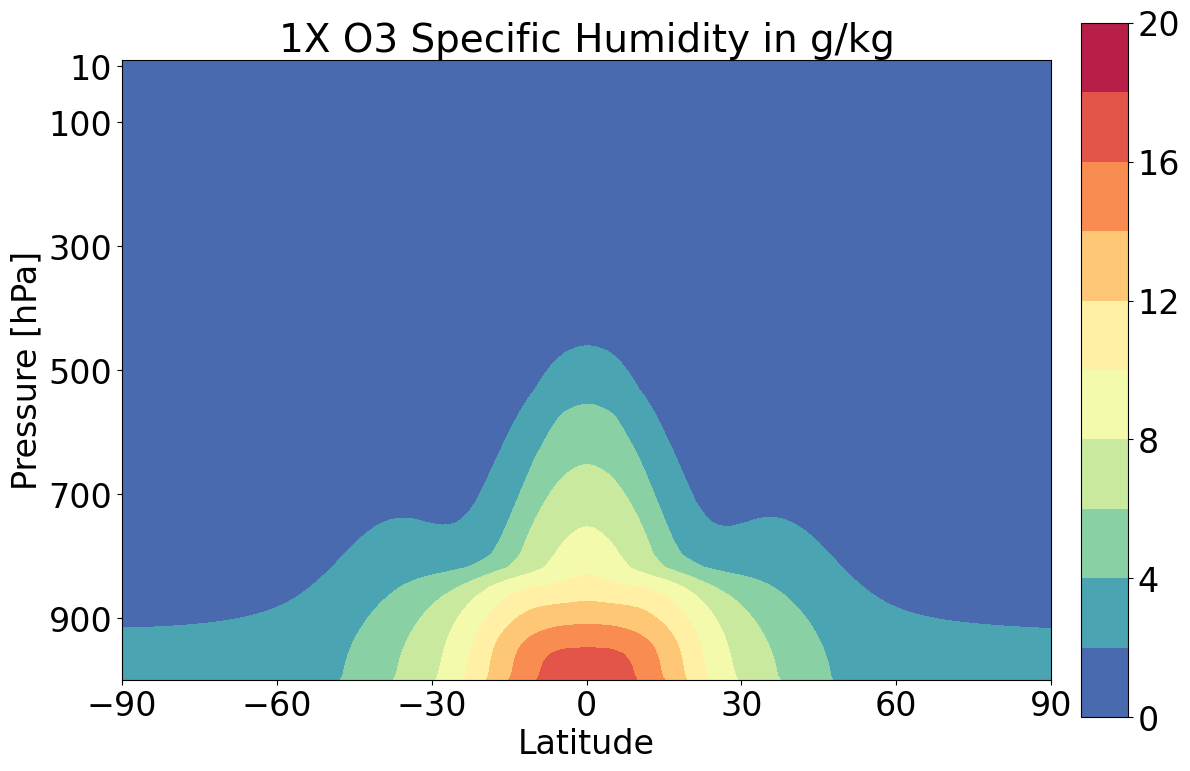

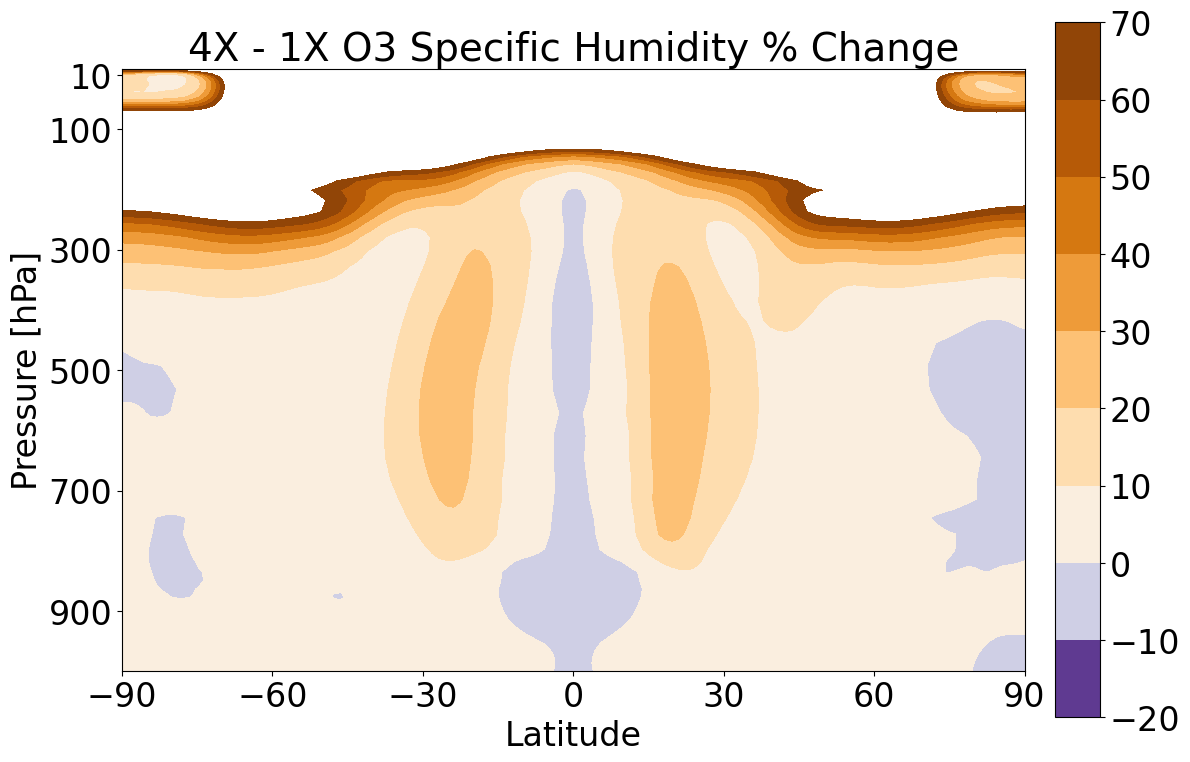

In [201]:

levels = np.concatenate((np.arange(-1.5e-5,0,5e-6),np.arange(0,3.5e-5+5e-6,5e-6)))
cbar_ticks = np.concatenate((np.array([-4,-2]),np.arange(0,40+5,5)))
p_levels = np.array([900,300,100,30,10,3,1,0.3]) #log
p_levels = np.array([900,700,500,300,100,10]) #linear

levels = np.concatenate((np.arange(-0.8,0,.2),np.arange(0,.4+.1,.1)))
levels= np.arange(0,20+2,2)
cbar_ticks = np.concatenate((np.arange(-30,0,10),np.arange(0,140+20,20)))

omega_levels = np.concatenate((np.arange(-0.12, 0 ,0.02), np.arange(0, 0.03+0.01, 0.01)))*100


netCDFplot.plot_contour(Q_4Xi.mean('lon')*1000, 'lat', 'lev', cmap='Spectral_r',
                        title=r'1X O3 Specific Humidity in g/kg',
                        levels=levels,y_ticks=p_levels,#cbar_ticks=cbar_ticks,
                        show=False, save=False,
                        output_file='CESM_Scripts/Final_Plots/1XQ_latLoglev_5yr',
                        flip_y=True, plot_size=None, axlabel_size=24,
                        titlelabel_size=28, extend=False,
                        aspect_ratio='3:2', log_y=False, center=False)

levels= np.arange(-20,70+10,10)


netCDFplot.plot_contour((Q_4Xi.mean('lon')-Q.mean('lon'))/Q.mean('lon')*100, 'lat', 'lev', cmap='PuOr_r',
                        title=r'4X - 1X O3 Specific Humidity % Change',
                        levels=levels,y_ticks=p_levels,#cbar_ticks=cbar_ticks,
                        show=False, save=False,
                        output_file='CESM_Scripts/Final_Plots/Diff4Xi_Q_latLoglev_5yr',
                        flip_y=True, plot_size=None, axlabel_size=24,
                        titlelabel_size=28, extend=False,
                        aspect_ratio='3:2', log_y=False, center=True)

In [37]:
O3_dataset = xr.open_dataset('/glade/work/aaroj/aquaplanet_ozone_hightop_c160920.nc')
O3_dataset = O3_dataset.metpy.parse_cf()
O3 = O3_dataset['OZONE']

0.0
Max Value: 1.04E+01
Min Value: 1.29E-02
Mean Magnitude: 1.46E+00


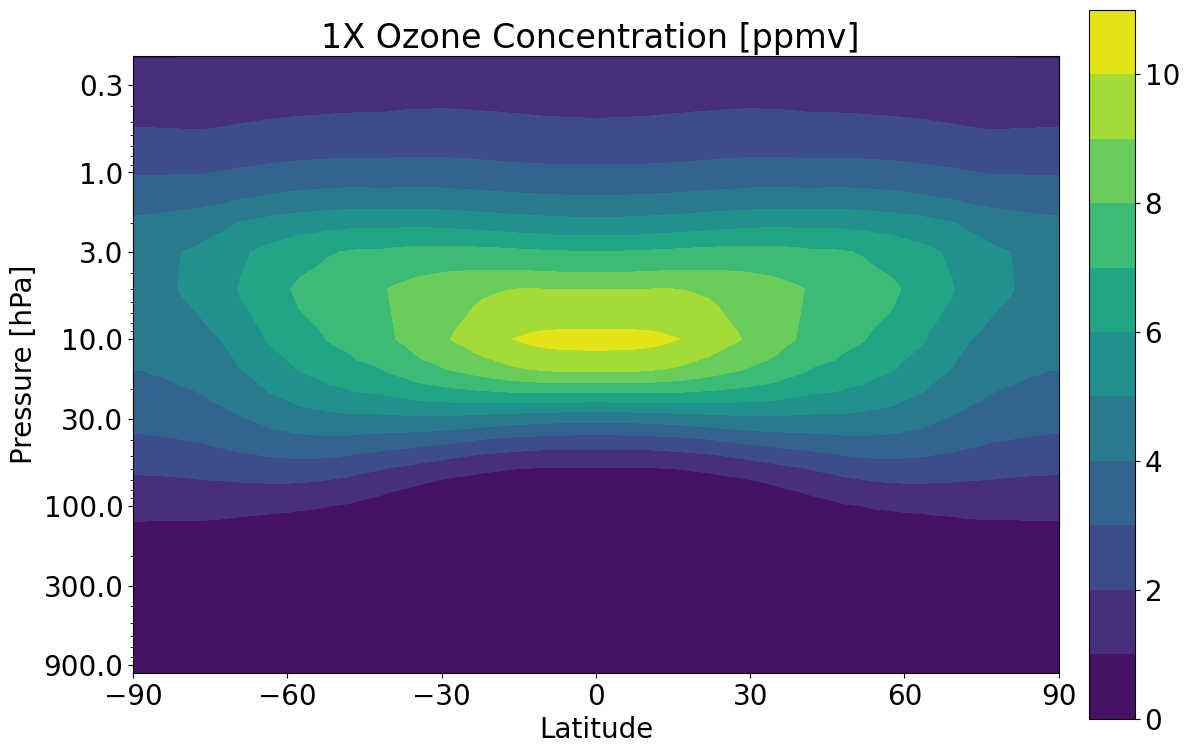

In [55]:
levels = np.arange(0,1.1e-5+0.1e-5,.1e-5)*1e6
cbar_ticks = np.concatenate((np.array([-4,-2]),np.arange(0,40+5,5)))
p_levels = np.array([900,300,100,30,10,3,1,0.3]) #log
# p_levels = np.array([900,700,500,300,100,10]) #linear

netCDFplot.plot_contour(O3[0,19:,:,:].mean('lon')*1e6, 'lat', 'lev', cmap='viridis',
                        title=r'1X Ozone Concentration [ppmv] ',
                        levels=levels,y_ticks=p_levels,
                        show=False, save=False,
                        output_file='CESM_Scripts/Final_Plots/1XOzoneFraction_latlev_ppmv',
                        flip_y=True, plot_size=(12,8), axlabel_size=20,
                        titlelabel_size=24, extend=False,
                        aspect_ratio='3:2', log_y=True, center=False)

# Vertical Temperature Profile

In [12]:
T = extract_timeAverage(Ozone1X_file,['T'],start_year=5)[0]
T_4Xi = extract_timeAverage(Ozone4Xi_file,['T'],start_year=5)[0]
T_4Xd = extract_timeAverage(Ozone4Xd_file,['T'],start_year=5)[0]

In [60]:
T_tropics = meridional_avg(T,lat_bounds=(-5,5),time=False)
T_4Xi_tropics = meridional_avg(T_4Xi,lat_bounds=(-5,5),time=False)
T_4Xd_tropics = meridional_avg(T_4Xd,lat_bounds=(-5,5),time=False)

T_midlat = meridional_avg(T,lat_bounds=(40,50),time=False)
T_4Xi_midlat = meridional_avg(T_4Xi,lat_bounds=(40,50),time=False)
T_4Xd_midlat = meridional_avg(T_4Xd,lat_bounds=(40,50),time=False)

T_polar = meridional_avg(T,lat_bounds=(80,90),time=False)
T_4Xi_polar = meridional_avg(T_4Xi,lat_bounds=(80,90),time=False)
T_4Xd_polar = meridional_avg(T_4Xd,lat_bounds=(80,90),time=False)

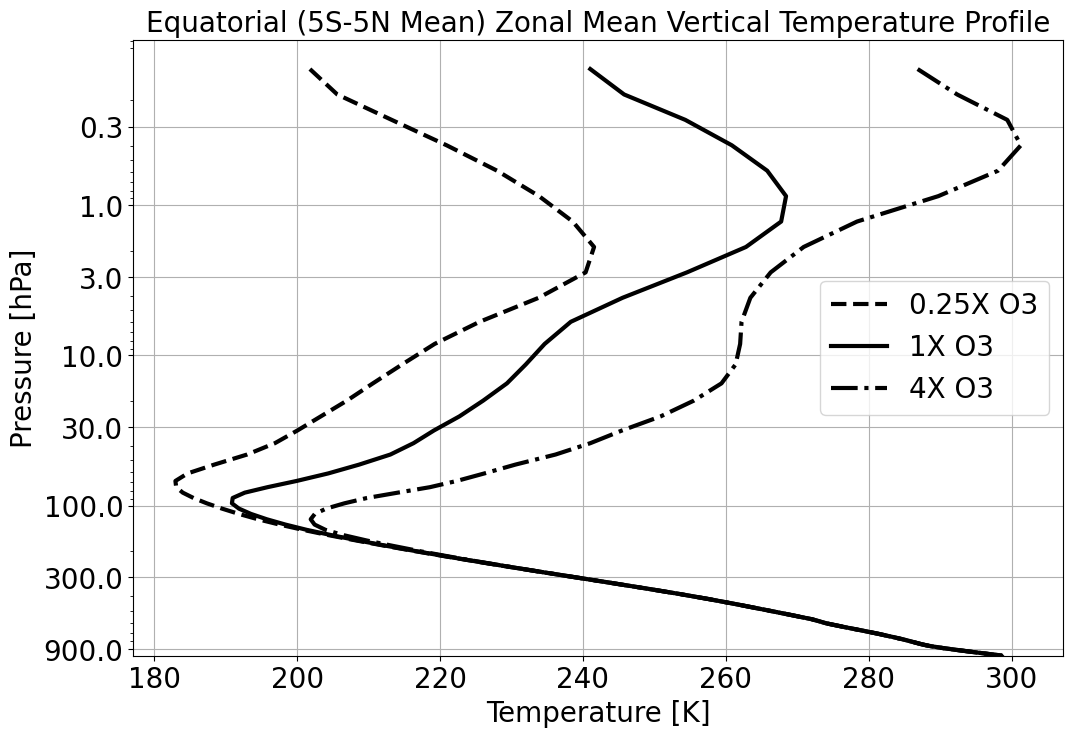

In [78]:
#plot T profile
fig,ax = plt.subplots(1,1,figsize=(12,8))

# ax.plot(T_4Xd_polar.mean('lon'),T.lev,'k--',linewidth=3)
# ax.plot(T_polar.mean('lon'),T.lev,'k-',linewidth=3)
# ax.plot(T_4Xi_polar.mean('lon'),T.lev,'k-.',linewidth=3)

# ax.plot(T_4Xd_midlat.mean('lon'),T.lev,'k--',linewidth=3)
# ax.plot(T_midlat.mean('lon'),T.lev,'k-',linewidth=3)
# ax.plot(T_4Xi_midlat.mean('lon'),T.lev,'k-.',linewidth=3)

ax.plot(T_4Xd_tropics.mean('lon'),T.lev,'k--',linewidth=3)
ax.plot(T_tropics.mean('lon'),T.lev,'k-',linewidth=3)
ax.plot(T_4Xi_tropics.mean('lon'),T.lev,'k-.',linewidth=3)


plt.yscale("log")
ax.get_yaxis().get_major_formatter().labelOnlyBase = False
ax.set_yticks(np.array([900,300,100,30,10,3,1,0.3]))
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(True)
ax.set_ylim(top=np.max(T.lev))
ax.set_xlabel('Temperature [K]',fontsize=20)
ax.set_ylabel('Pressure [hPa]',fontsize=20)
ax.legend(['0.25X O3','1X O3','4X O3'],fontsize=20,loc='best')
ax.tick_params(axis='both', which='major', labelsize=20)

# ax.set_title('Polar (80N-90N Mean) Zonal Mean Vertical Temperature Profile',fontsize=20)
# ax.set_title('Mid-Latitude (40N-50N Mean) Zonal Mean Vertical Temperature Profile',fontsize=20)
ax.set_title('Equatorial (5S-5N Mean) Zonal Mean Vertical Temperature Profile',fontsize=20)



plt.gca().invert_yaxis()
# fig.savefig(f"CESM_Scripts/Final_Plots/PolarAvg_Tprofile_O3comparison.png",dpi=300)
# fig.savefig(f"CESM_Scripts/Final_Plots/MidlatAvg_Tprofile_O3comparison.png",dpi=300)
# fig.savefig(f"CESM_Scripts/Final_Plots/TropicsAvg_Tprofile_O3comparison.png",dpi=300)



# Radiative Balance

In [207]:
QRS = extract_timeAverage(Ozone1X_file,['QRS'],start_year=5)[0].mean('lon')
QRS_4Xd = extract_timeAverage(Ozone4Xd_file,['QRS'],start_year=5)[0].mean('lon')
QRS_4Xi = extract_timeAverage(Ozone4Xi_file,['QRS'],start_year=5)[0].mean('lon')

QRL = extract_timeAverage(Ozone1X_file,['QRL'],start_year=5)[0].mean('lon')
QRL_4Xd = extract_timeAverage(Ozone4Xd_file,['QRL'],start_year=5)[0].mean('lon')
QRL_4Xi = extract_timeAverage(Ozone4Xi_file,['QRL'],start_year=5)[0].mean('lon')

In [219]:
QRS_latmean = meridional_avg(QRS,lat_bounds=(-90,90),time=False)
QRS_4Xd_latmean = meridional_avg(QRS_4Xd,lat_bounds=(-90,90),time=False)
QRS_4Xi_latmean = meridional_avg(QRS_4Xi,lat_bounds=(-90,90),time=False)

QRL_latmean = meridional_avg(QRL,lat_bounds=(-90,90),time=False)
QRL_4Xd_latmean = meridional_avg(QRL_4Xd,lat_bounds=(-90,90),time=False)
QRL_4Xi_latmean = meridional_avg(QRL_4Xi,lat_bounds=(-90,90),time=False)



QRS_polar = meridional_avg(QRS,lat_bounds=(80,90),time=False)
QRS_4Xd_polar = meridional_avg(QRS_4Xd,lat_bounds=(80,90),time=False)
QRS_4Xi_polar = meridional_avg(QRS_4Xi,lat_bounds=(80,90),time=False)

QRL_polar = meridional_avg(QRL,lat_bounds=(80,90),time=False)
QRL_4Xd_polar = meridional_avg(QRL_4Xd,lat_bounds=(80,90),time=False)
QRL_4Xi_polar = meridional_avg(QRL_4Xi,lat_bounds=(80,90),time=False)


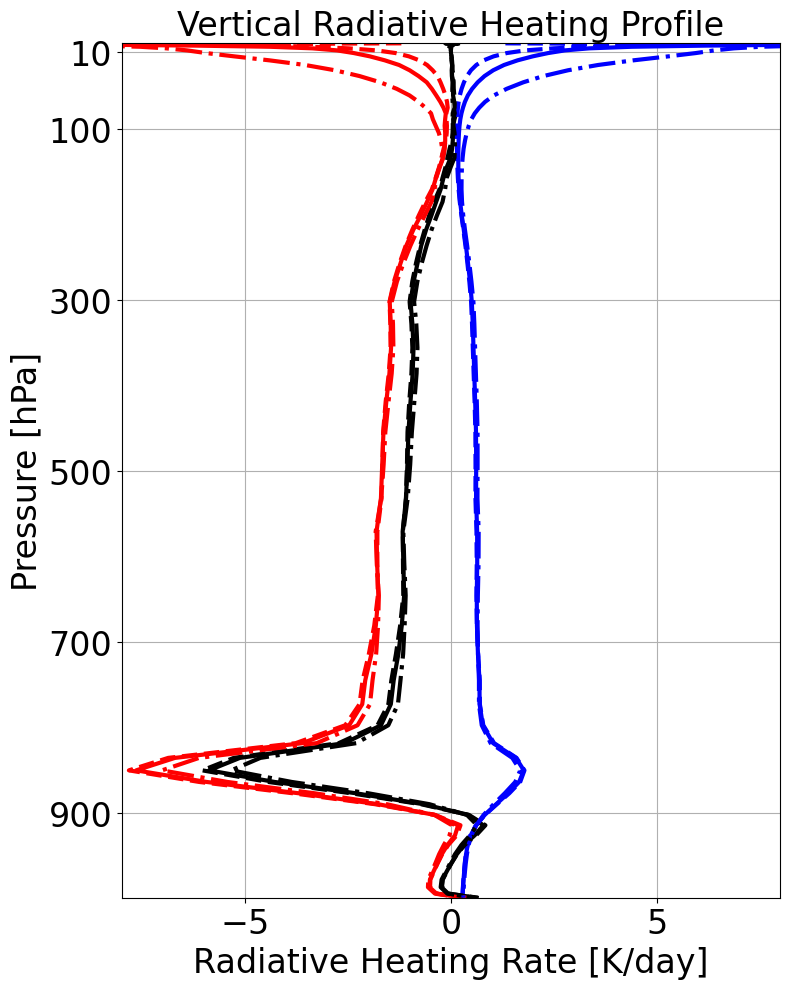

In [233]:
#plot Radiative Heating profile
fig,ax = plt.subplots(1,1,figsize=(8,10))

ax.plot(QRS_latmean*3600*24,QRS.lev,'b-',linewidth=3)
ax.plot(QRL_latmean*3600*24,QRL.lev,'r-',linewidth=3)
ax.plot((QRL_latmean+QRS_latmean)*3600*24,QRL.lev,'k-',linewidth=3)

ax.plot(QRS_4Xd_latmean*3600*24,QRS_4Xd.lev,'b--',linewidth=3)
ax.plot(QRL_4Xd_latmean*3600*24,QRL_4Xd.lev,'r--',linewidth=3)
ax.plot((QRL_4Xd_latmean+QRS_4Xd_latmean)*3600*24,QRL_4Xd.lev,'k--',linewidth=3)

ax.plot(QRS_4Xi_latmean*3600*24,QRS_4Xi.lev,'b-.',linewidth=3)
ax.plot(QRL_4Xi_latmean*3600*24,QRL_4Xi.lev,'r-.',linewidth=3)
ax.plot((QRL_4Xi_latmean+QRS_4Xi_latmean)*3600*24,QRL_4Xi.lev,'k-.',linewidth=3)


# plt.yscale("log")
# ax.get_yaxis().get_major_formatter().labelOnlyBase = False
p_levels = np.array([900,700,500,300,100,10]) #linear

# p_levels = np.array([900,300,100,30,10,3,1,0.3]) #log

ax.set_yticks(p_levels)
# ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(True)
# ax.set_ylim(top=np.max(T.lev))
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_ylim(bottom=QRS.lev.min(),top=QRS.lev.max())
ax.set_xlim([-8,8])
ax.set_xlabel('Radiative Heating Rate [K/day]',fontsize=24)
ax.set_ylabel('Pressure [hPa]',fontsize=24)
# ax.legend(['Equator','MidLat','Polar'],fontsize=16)
ax.set_title('Vertical Radiative Heating Profile',fontsize=24)
plt.gca().invert_yaxis()
plt.tight_layout()
# fig.savefig(f"CESM_Scripts/Final_Plots/VerticalRadiativeHeatingProfile_lev.png",dpi=300)

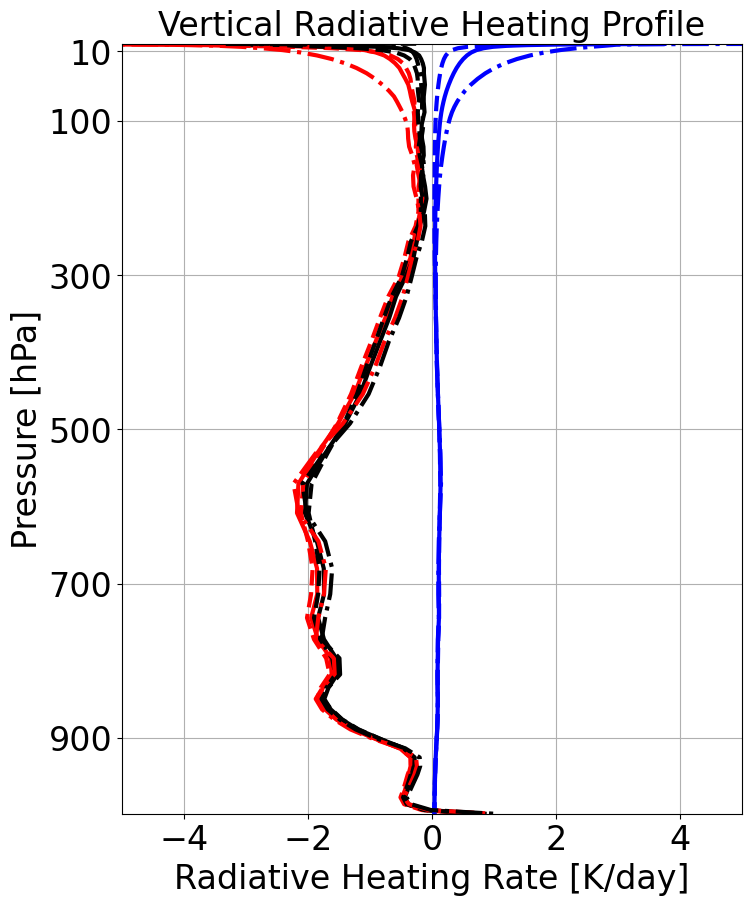

In [221]:
#plot Radiative Heating profile
fig,ax = plt.subplots(1,1,figsize=(8,10))

ax.plot(QRS_polar*3600*24,QRS.lev,'b-',linewidth=3)
ax.plot(QRL_polar*3600*24,QRL.lev,'r-',linewidth=3)
ax.plot((QRL_polar+QRS_polar)*3600*24,QRL.lev,'k-',linewidth=3)

ax.plot(QRS_4Xd_polar*3600*24,QRS_4Xd.lev,'b--',linewidth=3)
ax.plot(QRL_4Xd_polar*3600*24,QRL_4Xd.lev,'r--',linewidth=3)
ax.plot((QRL_4Xd_polar+QRS_4Xd_polar)*3600*24,QRL_4Xd.lev,'k--',linewidth=3)

ax.plot(QRS_4Xi_polar*3600*24,QRS_4Xi.lev,'b-.',linewidth=3)
ax.plot(QRL_4Xi_polar*3600*24,QRL_4Xi.lev,'r-.',linewidth=3)
ax.plot((QRL_4Xi_polar+QRS_4Xi_polar)*3600*24,QRL_4Xi.lev,'k-.',linewidth=3)


# plt.yscale("log")
# ax.get_yaxis().get_major_formatter().labelOnlyBase = False
p_levels = np.array([900,700,500,300,100,10]) #linear

# p_levels = np.array([900,300,100,30,10,3,1,0.3]) #log

ax.set_yticks(p_levels)
# ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(True)
# ax.set_ylim(top=np.max(T.lev))
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_ylim(bottom=QRS.lev.min(),top=QRS.lev.max())
ax.set_xlim([-5,5])
ax.set_xlabel('Radiative Heating Rate [K/day]',fontsize=24)
ax.set_ylabel('Pressure [hPa]',fontsize=24)
# ax.legend(['Equator','MidLat','Polar'],fontsize=16)
ax.set_title('Vertical Radiative Heating Profile',fontsize=24)
plt.gca().invert_yaxis()
# fig.savefig(f"CESM_Scripts/Final_Plots/VerticalRadiativeHeatingProfile_loglev.png",dpi=300)

In [202]:
FLUT = extract_timeAverage(Ozone1X_file,['FLUT'],start_year=5)[0].mean('lon')
FLUT_4Xd = extract_timeAverage(Ozone4Xd_file,['FLUT'],start_year=5)[0].mean('lon')
FLUT_4Xi = extract_timeAverage(Ozone4Xi_file,['FLUT'],start_year=5)[0].mean('lon')


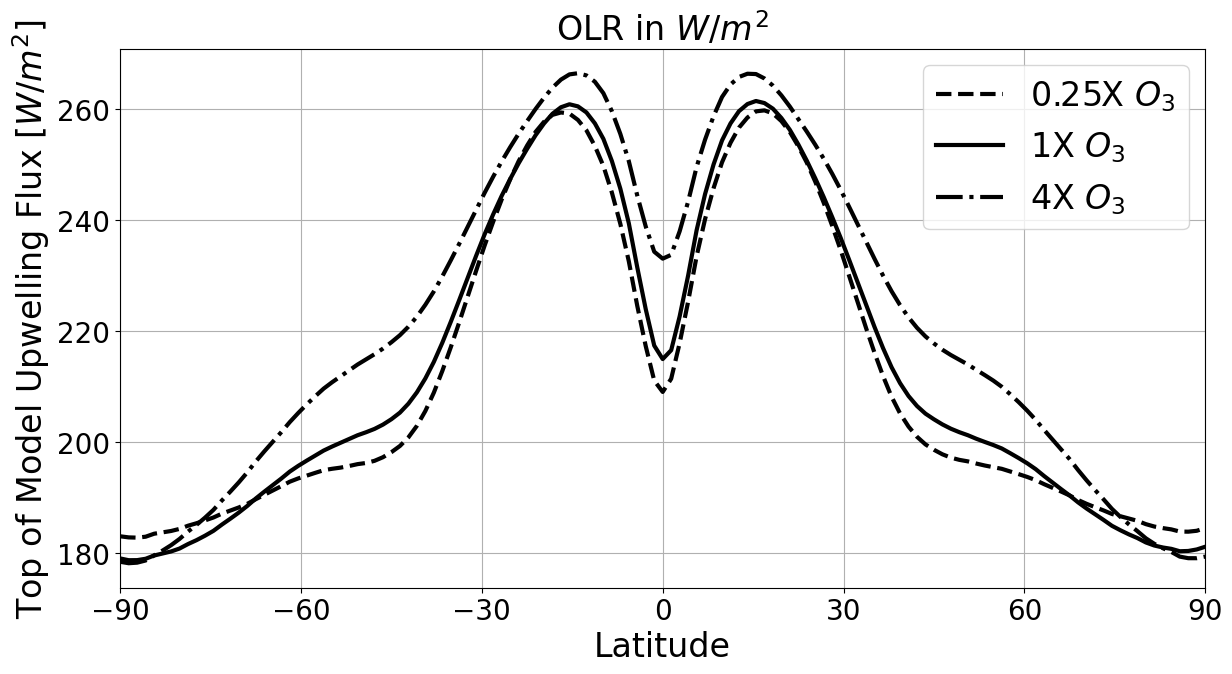

In [206]:
#plot OLR
fig,ax = plt.subplots(1,1,figsize=(14,7))

ax.plot(FLUT_4Xd.lat,FLUT_4Xd,'k--',linewidth=3)
ax.plot(FLUT.lat,FLUT,'k-',linewidth=3)
ax.plot(FLUT_4Xi.lat,FLUT_4Xi,'k-.',linewidth=3)

ax.grid(True)
# ax.set_ylim(top=np.max(T.lev))
# ax.set_ylim(bottom=QRS.lev.min(),top=QRS.lev.max())
ax.set_xlim([-90,90])
ax.set_xticks(np.linspace(-90,90,7))
ax.set_xlabel('Latitude',fontsize=24)
ax.set_ylabel(r'Top of Model Upwelling Flux [$W/m^2$]',fontsize=24)
ax.legend([r'0.25X $O_3$',r'1X $O_3$',r'4X $O_3$'],fontsize=24)
ax.set_title(r'OLR in $W/m^2$',fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)

# fig.savefig(f"CESM_Scripts/Final_Plots/FLUT_lat.png",dpi=300)

In [216]:
CLDTOT = extract_timeAverage(Ozone1X_file,['CLDTOT'],start_year=5)[0].mean('lon')
CLDTOT_4Xd = extract_timeAverage(Ozone4Xd_file,['CLDTOT'],start_year=5)[0].mean('lon')
CLDTOT_4Xi = extract_timeAverage(Ozone4Xi_file,['CLDTOT'],start_year=5)[0].mean('lon')


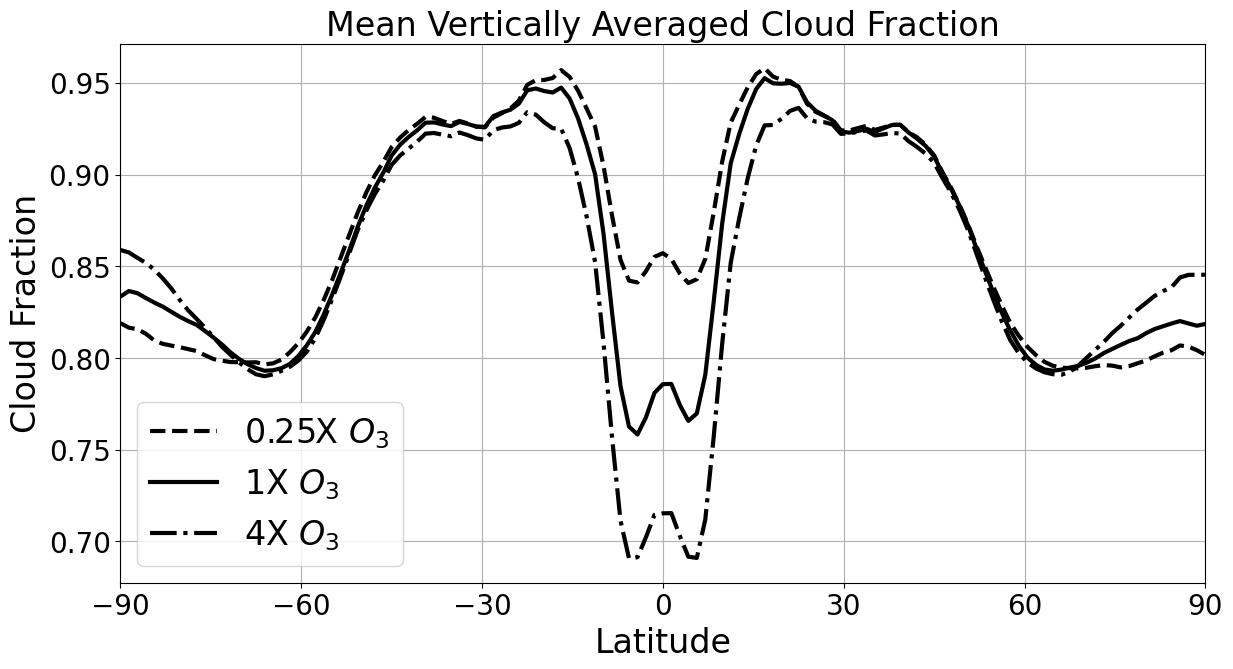

In [222]:
#plot CLDTot
fig,ax = plt.subplots(1,1,figsize=(14,7))

ax.plot(CLDTOT_4Xd.lat,CLDTOT_4Xd,'k--',linewidth=3)
ax.plot(CLDTOT.lat,CLDTOT,'k-',linewidth=3)
ax.plot(CLDTOT_4Xi.lat,CLDTOT_4Xi,'k-.',linewidth=3)

ax.grid(True)
# ax.set_ylim(top=np.max(T.lev))
# ax.set_ylim(bottom=QRS.lev.min(),top=QRS.lev.max())
ax.set_xlim([-90,90])
ax.set_xticks(np.linspace(-90,90,7))
ax.set_xlabel('Latitude',fontsize=24)
ax.set_ylabel(r'Cloud Fraction',fontsize=24)
ax.legend([r'0.25X $O_3$',r'1X $O_3$',r'4X $O_3$'],fontsize=24)
ax.set_title('Mean Vertically Averaged Cloud Fraction',fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
# fig.savefig(f"CESM_Scripts/Final_Plots/CLDTOT_lat.png",dpi=300)

In [223]:
CLOUD = extract_timeAverage(Ozone1X_file,['CLOUD'],start_year=5)[0].mean('lon')
CLOUD_4Xd = extract_timeAverage(Ozone4Xd_file,['CLOUD'],start_year=5)[0].mean('lon')
CLOUD_4Xi = extract_timeAverage(Ozone4Xi_file,['CLOUD'],start_year=5)[0].mean('lon')


In [234]:
CLOUD_latmean = meridional_avg(CLOUD,lat_bounds=(-90,90),time=False)
CLOUD_4Xd_latmean = meridional_avg(CLOUD_4Xd,lat_bounds=(-90,90),time=False)
CLOUD_4Xi_latmean = meridional_avg(CLOUD_4Xi,lat_bounds=(-90,90),time=False)

CLOUD_tropics = meridional_avg(CLOUD,lat_bounds=(-5,5),time=False)
CLOUD_4Xd_tropics = meridional_avg(CLOUD_4Xd,lat_bounds=(-5,5),time=False)
CLOUD_4Xi_tropics = meridional_avg(CLOUD_4Xi,lat_bounds=(-5,5),time=False)

In [84]:
CLOUD.lev[34:43]

<xarray.DataArray 'lev' (lev: 9)> Size: 72B
array([200.99894 , 218.080997, 236.614787, 256.723686, 278.541558, 302.21364 ,
       327.897506, 355.764129, 385.999024])
Coordinates:
  * lev        (lev) float64 72B 201.0 218.1 236.6 256.7 ... 327.9 355.8 386.0
    metpy_crs  object 8B Projection: latitude_longitude
Attributes:
    long_name:    hybrid level at midpoints (1000*(A+B))
    units:        hPa
    positive:     down
    _metpy_axis:  vertical

In [85]:
CLOUD_toplevel = np.mean(CLOUD[34:43],axis=0)
CLOUD_4Xd_toplevel = np.mean(CLOUD_4Xd[34:43],axis=0)
CLOUD_4Xi_toplevel = np.mean(CLOUD_4Xi[34:43],axis=0)

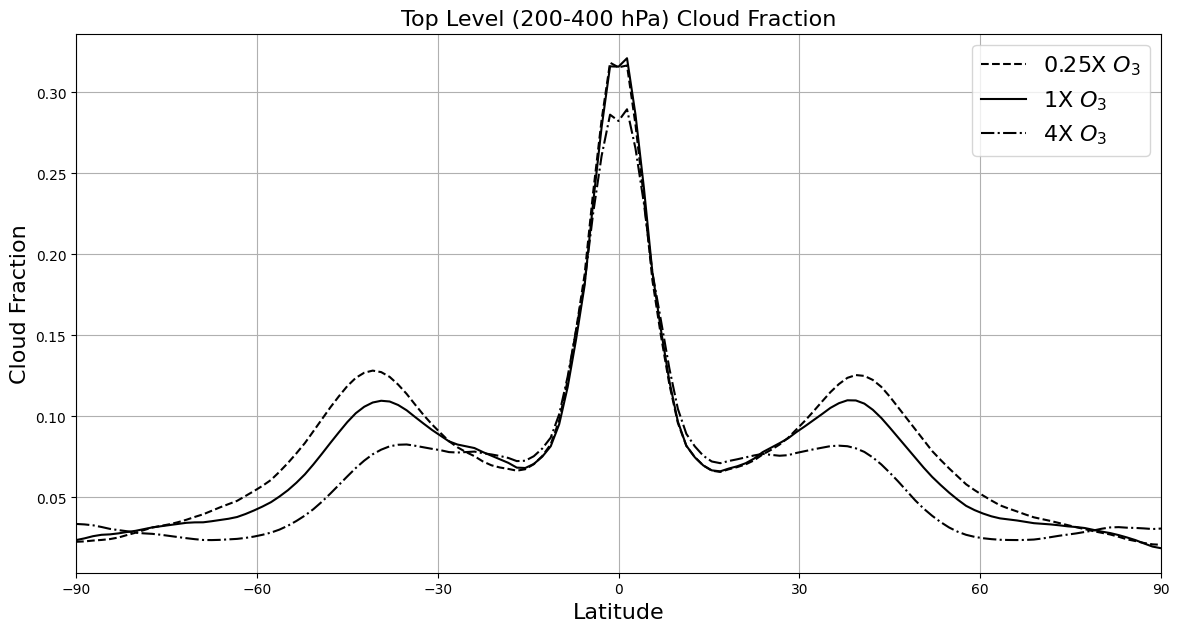

In [87]:
#plot CLOUD top level
fig,ax = plt.subplots(1,1,figsize=(14,7))

ax.plot(CLOUD_4Xd.lat,CLOUD_4Xd_toplevel,'k--')
ax.plot(CLOUD.lat,CLOUD_toplevel,'k-')
ax.plot(CLOUD_4Xi.lat,CLOUD_4Xi_toplevel,'k-.')

ax.grid(True)
# ax.set_ylim(top=np.max(T.lev))
# ax.set_ylim(bottom=QRS.lev.min(),top=QRS.lev.max())
ax.set_xlim([-90,90])
ax.set_xticks(np.linspace(-90,90,7))
ax.set_xlabel('Latitude',fontsize=16)
ax.set_ylabel(r'Cloud Fraction',fontsize=16)
ax.legend([r'0.25X $O_3$',r'1X $O_3$',r'4X $O_3$'],fontsize=16)
ax.set_title('Top Level (200-400 hPa) Cloud Fraction',fontsize=16)
# fig.savefig(f"TopLevelCloudFraction_lat.png",dpi=300)

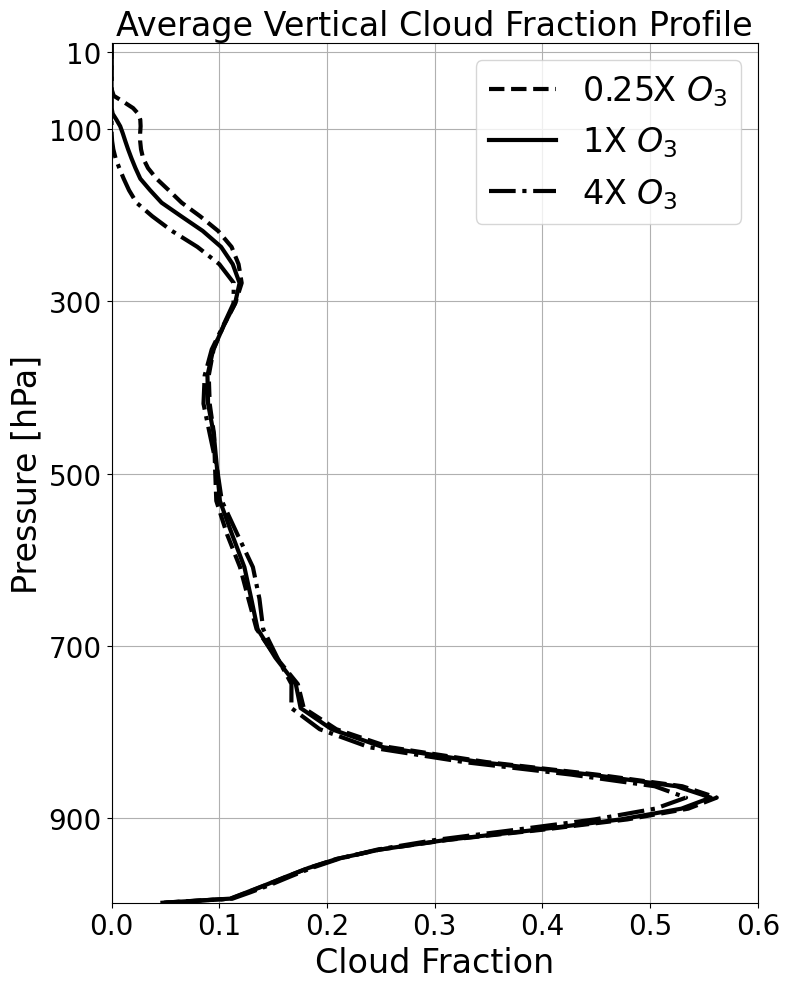

In [230]:
#plot CLOUD
fig,ax = plt.subplots(1,1,figsize=(8,10))


ax.plot(CLOUD_4Xd_latmean,CLOUD_4Xd.lev,'k--',linewidth=3)
ax.plot(CLOUD_latmean,CLOUD.lev,'k-',linewidth=3)
ax.plot(CLOUD_4Xi_latmean,CLOUD_4Xi.lev,'k-.',linewidth=3)


# plt.yscale("log")
# ax.get_yaxis().get_major_formatter().labelOnlyBase = False
p_levels = np.array([900,700,500,300,100,10]) #linear

# p_levels = np.array([900,300,100,30,10,3,1,0.3]) #log

ax.set_yticks(p_levels)
# ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(True)
# ax.set_ylim(top=np.max(T.lev))
ax.set_ylim(bottom=QRS.lev.min(),top=QRS.lev.max())
ax.set_xlim([0,0.6])
ax.set_xlabel('Cloud Fraction',fontsize=24)
ax.set_ylabel('Pressure [hPa]',fontsize=24)
ax.legend([r'0.25X $O_3$',r'1X $O_3$',r'4X $O_3$'],fontsize=24)
ax.set_title('Average Vertical Cloud Fraction Profile',fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.gca().invert_yaxis()
plt.tight_layout()
# fig.savefig(f"CESM_Scripts/Final_Plots/VerticalCloudFraction_lev.png",dpi=300)

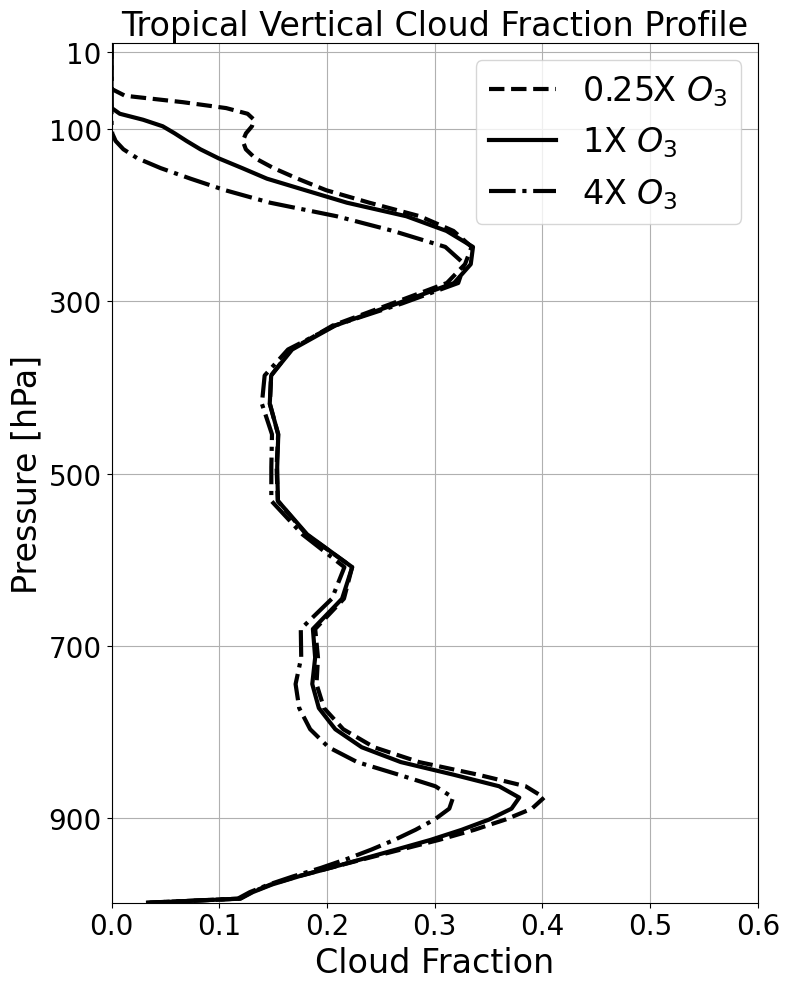

In [236]:
#plot CLOUD
fig,ax = plt.subplots(1,1,figsize=(8,10))


ax.plot(CLOUD_4Xd_tropics,CLOUD_4Xd.lev,'k--',linewidth=3)
ax.plot(CLOUD_tropics,CLOUD.lev,'k-',linewidth=3)
ax.plot(CLOUD_4Xi_tropics,CLOUD_4Xi.lev,'k-.',linewidth=3)


# plt.yscale("log")
# ax.get_yaxis().get_major_formatter().labelOnlyBase = False
p_levels = np.array([900,700,500,300,100,10]) #linear

# p_levels = np.array([900,300,100,30,10,3,1,0.3]) #log

ax.set_yticks(p_levels)
# ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.grid(True)
# ax.set_ylim(top=np.max(T.lev))
ax.set_ylim(bottom=QRS.lev.min(),top=QRS.lev.max())
ax.set_xlim([0,0.6])
ax.set_xlabel('Cloud Fraction',fontsize=24)
ax.set_ylabel('Pressure [hPa]',fontsize=24)
ax.legend([r'0.25X $O_3$',r'1X $O_3$',r'4X $O_3$'],fontsize=24)
ax.set_title('Tropical Vertical Cloud Fraction Profile',fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.gca().invert_yaxis()
plt.tight_layout()
fig.savefig(f"CESM_Scripts/Final_Plots/TropicalVerticalCloudFraction_lev.png",dpi=300)

# QBO Plot

In [277]:
dataset = xr.open_dataset(QBO_Ozone1X_file)
dataset = dataset.metpy.parse_cf()
U = dataset['U'].mean('lon')
dataset.close()


In [278]:
dataset = xr.open_dataset(QBO_Ozone4Xi_file)
dataset = dataset.metpy.parse_cf()
U_4Xi = dataset['U'].mean('lon')
dataset.close()


In [279]:
dataset = xr.open_dataset(QBO_Ozone4Xd_file)
dataset = dataset.metpy.parse_cf()
U_4Xd = dataset['U'].mean('lon')
dataset.close()


In [282]:
U_tropics = meridional_avg(U,lat_bounds=(-5,5))
U_4Xi_tropics = meridional_avg(U_4Xi,lat_bounds=(-5,5))
U_4Xd_tropics = meridional_avg(U_4Xd,lat_bounds=(-5,5))
Time = np.arange(0,121,1)
X,Y = np.meshgrid(U.lev,Time)

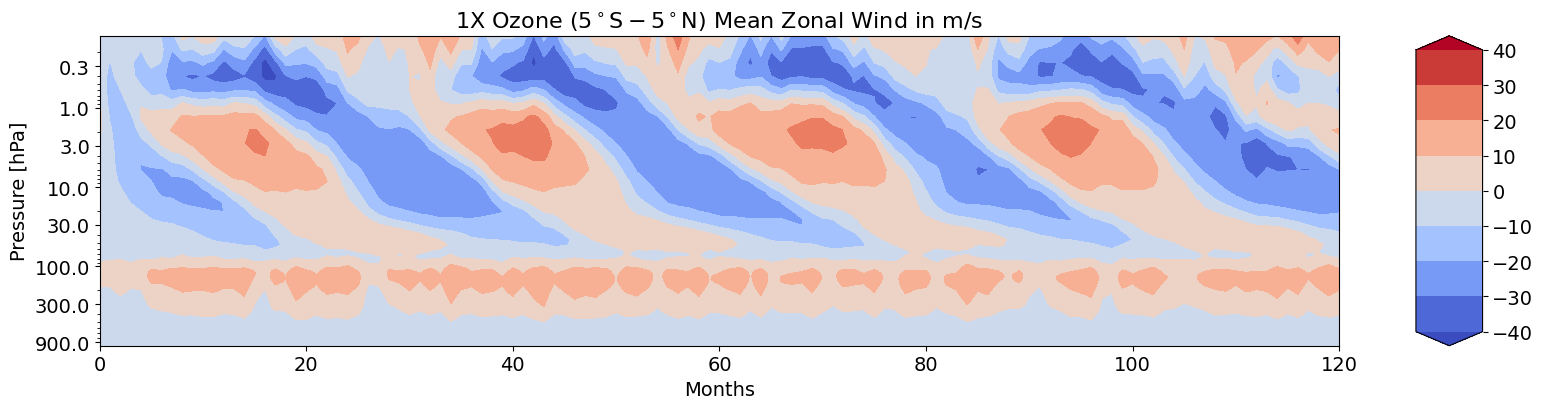

In [285]:
fig,ax = plt.subplots(1,1,figsize=(16,4))
plt.yscale("log")
ax.get_yaxis().get_major_formatter().labelOnlyBase = False
plt.gca().invert_yaxis()
levels = np.arange(-40,40+10,10)
p_levels = np.array([900,300,100,30,10,3,1,0.3])
cmap = 'coolwarm'
CF = ax.contourf(Y.T,X.T,U_tropics.T,levels = levels,cmap=cmap,
                         norm=netCDFplot.Midpoint_Normalize(midpoint=0,vmin=levels[0],vmax=levels[-1]),
                         extend='both')

#format to ensure aspect ratio is maintained
ax.set_box_aspect(1/4)
divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes("right", size="5%", pad=0.3)  
# Colorbar with 5% width of the plot

norm = colors.BoundaryNorm(levels,  plt.get_cmap(cmap).N, clip=True)
cbar = fig.colorbar(CF,cax=cbar_ax,boundaries=levels, ticks=levels,
                        spacing='proportional')

cbar.ax.tick_params(labelsize=14)
ax.set_xlabel("Months",fontsize=14)
ax.set_yticks(p_levels)
ax.set_ylabel('Pressure [hPa]',fontsize=14)
ax.get_yaxis().set_major_formatter(ScalarFormatter())

ax.tick_params(axis='both', which='major', labelsize=14)
# ax.set_title(r'1X Ozone SEne16L72 (Aaron-like) Zonal, ($5^\circ \text{S}-5^\circ\text{N}$) mean U in m/s',fontsize=14)
ax.set_title(r'1X Ozone ($5^\circ \text{S}-5^\circ\text{N}$) Mean Zonal Wind in m/s',fontsize=16)

fig.tight_layout()

# plt.show()

# fig.savefig(f"CESM_Scripts/Final_Plots/QBO_1XOzone_AaronLike.png",dpi=300)

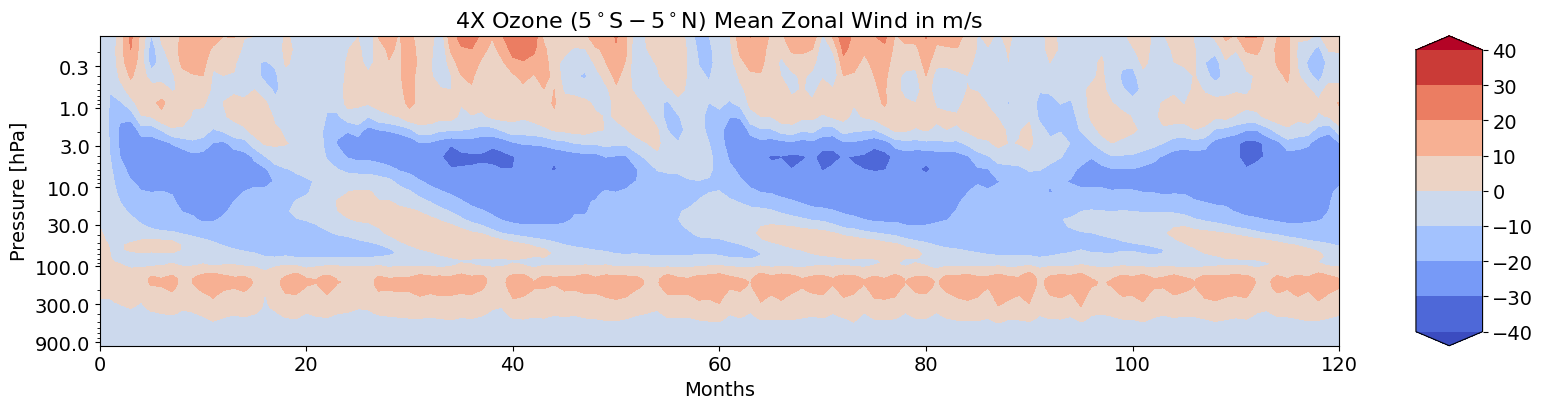

In [288]:
fig,ax = plt.subplots(1,1,figsize=(16,4))
plt.yscale("log")
ax.get_yaxis().get_major_formatter().labelOnlyBase = False
plt.gca().invert_yaxis()
levels = np.arange(-40,40+10,10)
p_levels = np.array([900,300,100,30,10,3,1,0.3])
cmap = 'coolwarm'
CF = ax.contourf(Y.T,X.T,U_4Xi_tropics.T,levels = levels,cmap=cmap,
                         norm=netCDFplot.Midpoint_Normalize(midpoint=0,vmin=levels[0],vmax=levels[-1]),
                         extend='both')

#format to ensure aspect ratio is maintained
ax.set_box_aspect(1/4)
divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes("right", size="5%", pad=0.3)  
# Colorbar with 5% width of the plot

norm = colors.BoundaryNorm(levels,  plt.get_cmap(cmap).N, clip=True)
cbar = fig.colorbar(CF,cax=cbar_ax,boundaries=levels, ticks=levels,
                        spacing='proportional')

cbar.ax.tick_params(labelsize=14)
ax.set_xlabel("Months",fontsize=14)
ax.set_yticks(p_levels)
ax.set_ylabel('Pressure [hPa]',fontsize=14)
ax.get_yaxis().set_major_formatter(ScalarFormatter())

ax.tick_params(axis='both', which='major', labelsize=14)
# ax.set_title(r'4X Ozone SEne16L72  (Aaron-like) Zonal, ($5^\circ \text{S}-5^\circ\text{N}$) mean U in m/s',fontsize=14)
ax.set_title(r'4X Ozone ($5^\circ \text{S}-5^\circ\text{N}$) Mean Zonal Wind in m/s',fontsize=16)

fig.tight_layout()

plt.show()
# fig.savefig(f"CESM_Scripts/Final_Plots/QBO_4XiOzone_Aaronlike.png",dpi=300)

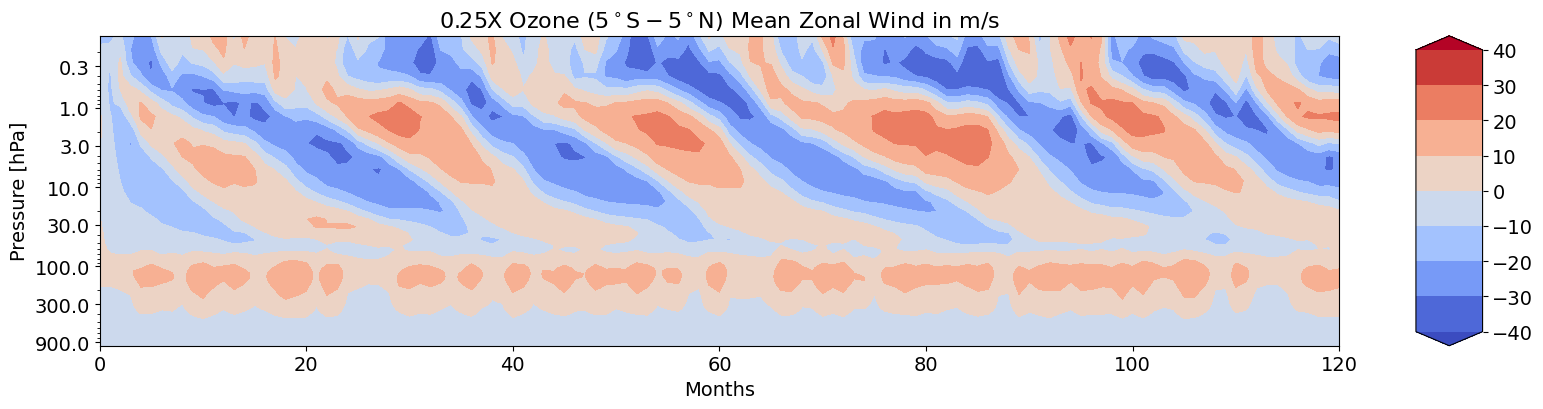

In [290]:
fig,ax = plt.subplots(1,1,figsize=(16,4))
plt.yscale("log")
ax.get_yaxis().get_major_formatter().labelOnlyBase = False
plt.gca().invert_yaxis()
levels = np.arange(-40,40+10,10)
p_levels = np.array([900,300,100,30,10,3,1,0.3])
cmap = 'coolwarm'
CF = ax.contourf(Y.T,X.T,U_4Xd_tropics.T,levels = levels,cmap=cmap,
                         norm=netCDFplot.Midpoint_Normalize(midpoint=0,vmin=levels[0],vmax=levels[-1]),
                         extend='both')

#format to ensure aspect ratio is maintained
ax.set_box_aspect(1/4)
divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes("right", size="5%", pad=0.3)  
# Colorbar with 5% width of the plot

norm = colors.BoundaryNorm(levels,  plt.get_cmap(cmap).N, clip=True)
cbar = fig.colorbar(CF,cax=cbar_ax,boundaries=levels, ticks=levels,
                        spacing='proportional')

cbar.ax.tick_params(labelsize=14)
ax.set_xlabel("Months",fontsize=14)
ax.set_yticks(p_levels)
ax.set_ylabel('Pressure [hPa]',fontsize=14)
ax.get_yaxis().set_major_formatter(ScalarFormatter())

ax.tick_params(axis='both', which='major', labelsize=14)
# ax.set_title(r'0.25X Ozone SEne16L72 (Aaron-like) Zonal, ($5^\circ \text{S}-5^\circ\text{N}$) mean U in m/s',fontsize=14)
ax.set_title(r'0.25X Ozone ($5^\circ \text{S}-5^\circ\text{N}$) Mean Zonal Wind in m/s',fontsize=16)
fig.tight_layout()

plt.show()

# fig.savefig(f"CESM_Scripts/Final_Plots/QBO_4XdOzone_Aaronlike.png",dpi=300)

# Pressure to Height
Assuming Hydrostatic Balance, we will convert pressures to height coordinates. While I won't do this here, I should first convert hybrid coordinates to pressure and then use those values when converting, but I will assume hybrid and pressure coordinates are approximately the same, which works well for an aquaplanet with no topography. 
$$\frac{\partial p}{\partial z}=-\frac{pg}{R_d T}$$
$$z = -\frac{R_d}{g}\int_{p_s}^{p}\frac{ T}{p'} dp'$$

In [239]:
R_d = 287
g = 9.81
T_vert = meridional_avg(T,lat_bounds=(-90,90),time=False).mean('lon')

In [263]:
z = [np.trapezoid(T_vert[i-1:]/(T.lev[i-1:]*100),T.lev[i-1:]*100)*(R_d/g) for i in range(len(T.lev),0,-1)]
print(z)

[np.float64(0.0), np.float64(39.84125570713175), np.float64(103.630467208933), np.float64(179.19130942875958), np.float64(259.6492957905326), np.float64(344.969470981878), np.float64(435.11620028352394), np.float64(530.0524408764983), np.float64(629.7392150655465), np.float64(734.1356251202814), np.float64(843.1993297725571), np.float64(956.8893211668209), np.float64(1075.17051489532), np.float64(1198.024963635851), np.float64(1325.4654171586456), np.float64(1464.7784186059528), np.float64(1632.3869703225193), np.float64(1840.2222907672217), np.float64(2090.7409471194223), np.float64(2383.247022498761), np.float64(2716.933189378088), np.float64(3090.820314782321), np.float64(3503.7855524189013), np.float64(3954.6209238926576), np.float64(4446.272076189105), np.float64(4979.074536539264), np.float64(5547.203346623247), np.float64(6135.269537194407), np.float64(6721.684404489899), np.float64(7298.239080266015), np.float64(7864.908400146566), np.float64(8421.781772678038), np.float64(8969

## With isothermal approximation
$$p=p_s\exp{-\frac{gz}{R_dT}}$$
$$z=-\frac{R_d T}{g}\ln(p/p_s)$$

In [255]:
# a good scale height is ~7 km
z_isothermal = -7*1000 * np.log(T.lev/T.lev[-1])
print(z_isothermal)

<xarray.DataArray 'lev' (lev: 72)> Size: 576B
array([ 6.29659328e+04,  6.02381730e+04,  5.75104133e+04,  5.47826535e+04,
        5.20548938e+04,  4.93271340e+04,  4.65993743e+04,  4.38716145e+04,
        4.11438548e+04,  3.84160951e+04,  3.58383440e+04,  3.34649872e+04,
        3.12632987e+04,  2.92332742e+04,  2.73749100e+04,  2.56882028e+04,
        2.41731494e+04,  2.28135009e+04,  2.15934791e+04,  2.05109442e+04,
        1.95658951e+04,  1.87583310e+04,  1.80882509e+04,  1.75013072e+04,
        1.69303390e+04,  1.63593709e+04,  1.57884029e+04,  1.52174347e+04,
        1.46464663e+04,  1.40754978e+04,  1.35045295e+04,  1.29335615e+04,
        1.23625933e+04,  1.17916250e+04,  1.12206567e+04,  1.06496883e+04,
        1.00787200e+04,  9.50775163e+03,  8.93678322e+03,  8.36581481e+03,
        7.79484656e+03,  7.22387843e+03,  6.65291022e+03,  6.08194188e+03,
        5.51097352e+03,  4.94773956e+03,  4.41199430e+03,  3.91662954e+03,
        3.46512198e+03,  3.05553023e+03,  2.68397947e+

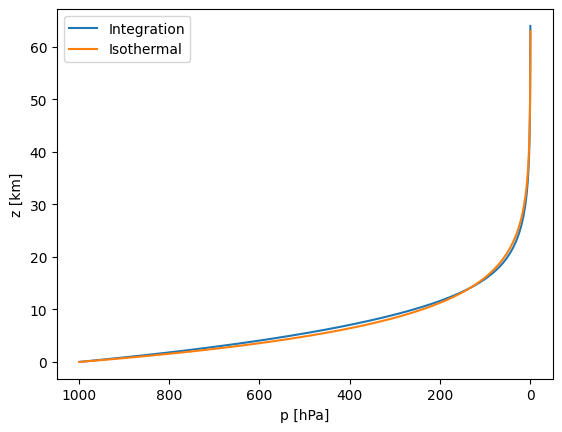

In [274]:
fig,ax = plt.subplots(1,1)

ax.plot(T.lev[::-1],np.array(z)/1000,'-')
ax.plot(T.lev,np.array(z_isothermal)/1000,'-')
plt.gca().invert_xaxis()
ax.legend(['Integration','Isothermal'])

ax.set_ylabel('z [km]')
ax.set_xlabel('p [hPa]')
plt.show()